# Part1: Visualization of 'flute.wav'

In [2]:
import librosa
from IPython.display import Audio

y, sr = librosa.load("./Dataset/flute.wav")

Audio(data=y,rate=sr)

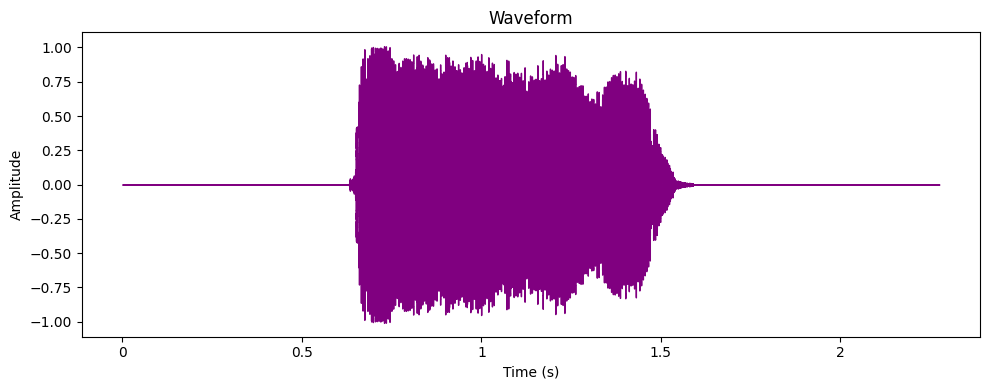

In [4]:
import matplotlib.pyplot as plt

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr, color='purple')
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

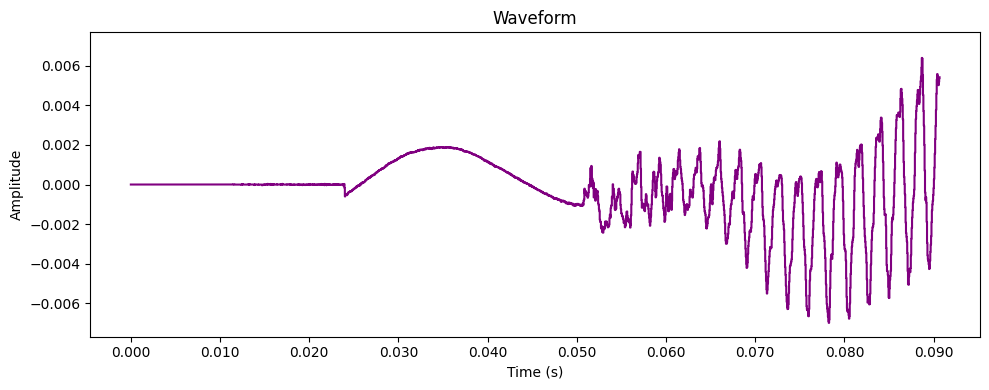

In [7]:
# Plot first 2000 samples ( which is 0.0907 sec)
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y[:2000], sr=sr, color='purple')
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

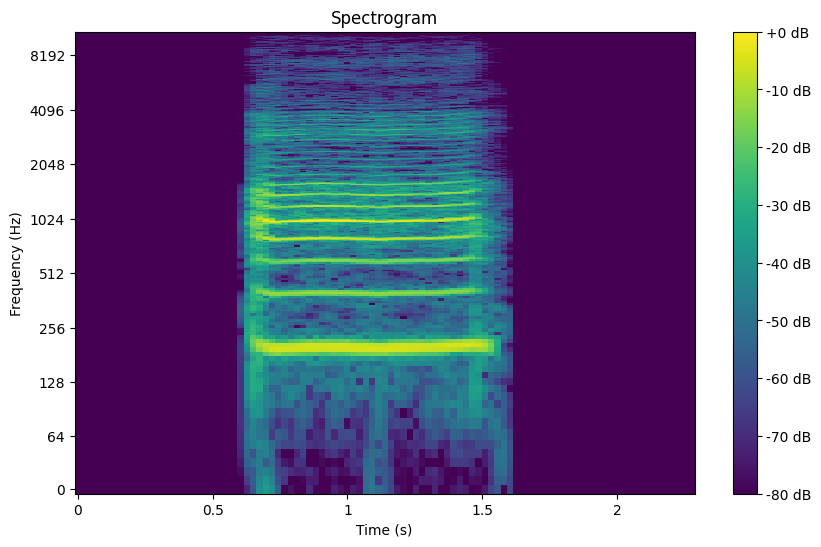

In [5]:
import numpy as np
# Calculate the STFT of the audio signal
D = np.abs(librosa.stft(y))
# Convert the amplitude spectrogram to dB-scaled spectrogram
D_db = librosa.amplitude_to_db(D, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

# Part2: Comparison of violin1 and violin2

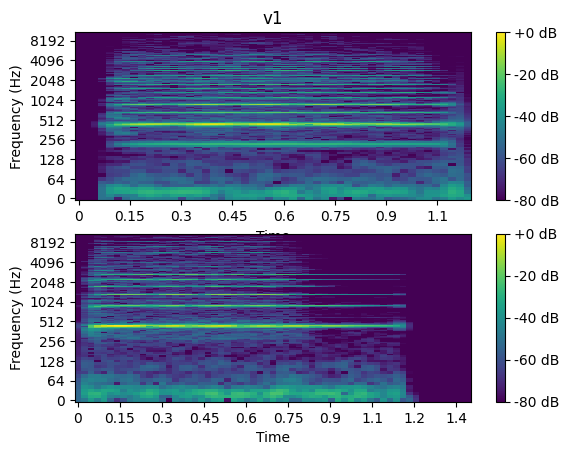

In [15]:
v1, sr1 = librosa.load("./Dataset/violin2.wav")
v2, sr2 = librosa.load("./Dataset/violin1.wav")

# Calculate the STFT of the audio signal
D1 = np.abs(librosa.stft(v1))
D2 = np.abs(librosa.stft(v2))
# Convert the amplitude spectrogram to dB-scaled spectrogram
D1_db = librosa.amplitude_to_db(D1, ref=np.max)
D2_db = librosa.amplitude_to_db(D2, ref=np.max)

# Plot the spectrogram
# plt.figure(figsize=(10, 6))
plt.subplot(2,1,1)
librosa.display.specshow(D1_db, sr=sr1, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('v1')
plt.ylabel('Frequency (Hz)')

plt.subplot(2,1,2)
librosa.display.specshow(D2_db, sr=sr2, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.ylabel('Frequency (Hz)')
plt.show()

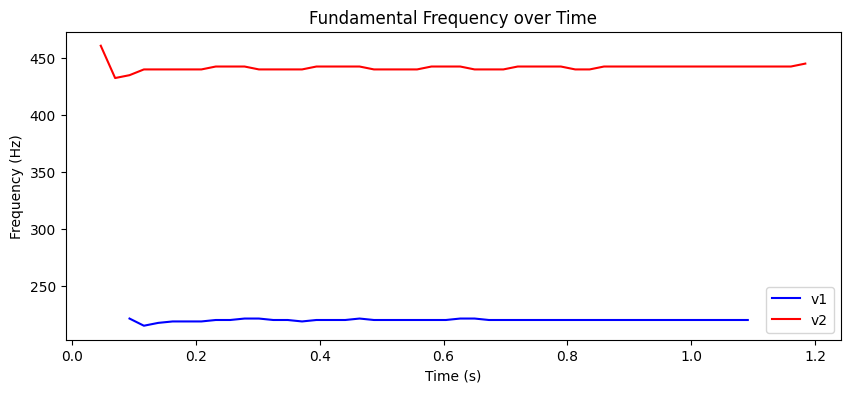

In [18]:
# Compute the fundamental frequency (f0) using pYIN
f0, voiced_flag, voiced_probs = librosa.pyin(v1, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
f00, voiced_flag, voiced_probs = librosa.pyin(v2, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

# Define the time axis for plotting
times1 = librosa.times_like(f0, sr=sr)
times2 = librosa.times_like(f00,sr=sr)
# Plot the fundamental frequency
plt.figure(figsize=(10, 4))
plt.plot(times1, f0, color='blue', label='v1')
plt.plot(times2, f00,color='red', label='v2')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Fundamental Frequency over Time')
plt.legend()
plt.show()

# Part 3

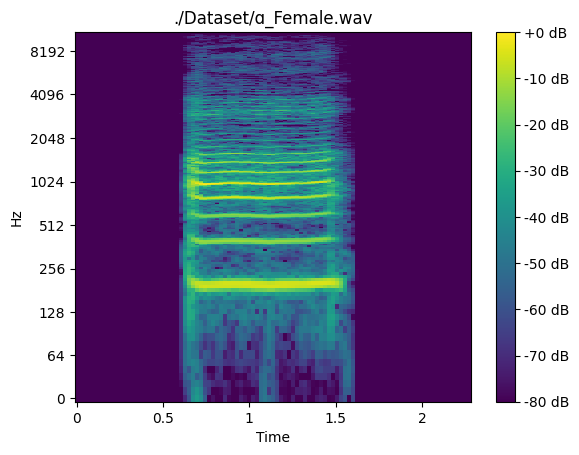

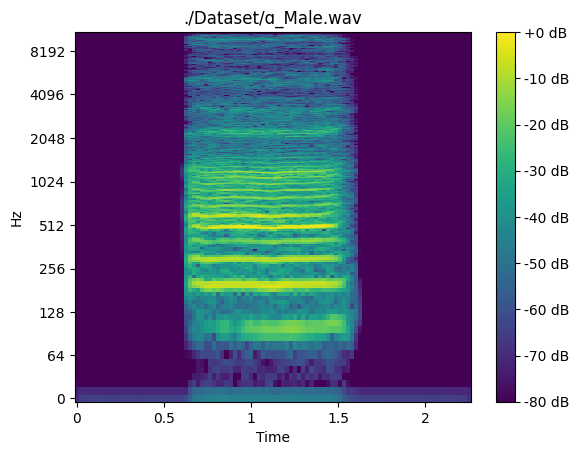

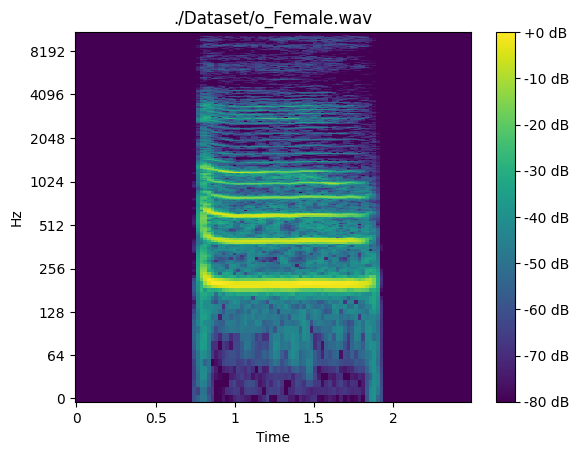

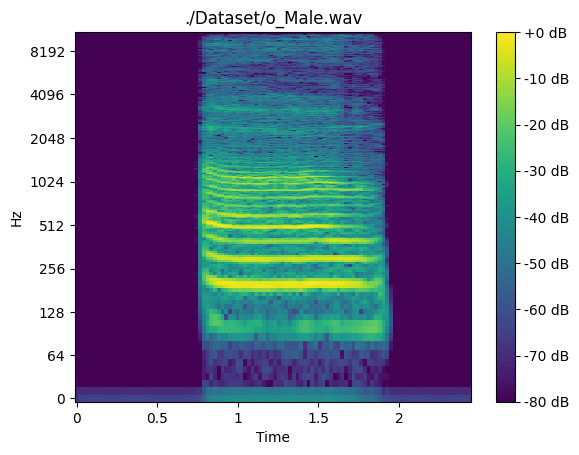

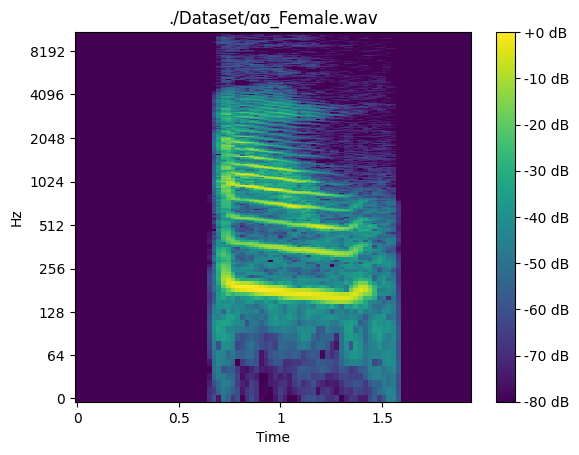

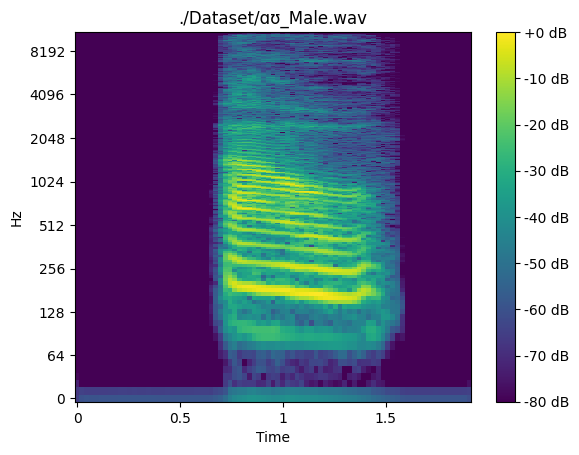

In [ ]:
for file in ['ɑ_Female','ɑ_Male','o_Female','o_Male','ɑʊ_Female','ɑʊ_Male']:
    file = './Dataset/'+file+'.wav'
    y,sr = librosa.load(file)
    stft = np.abs(librosa.stft(y,n_fft=2048))
    stft_db = librosa.amplitude_to_db(stft, ref=np.max)
    librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title(file)
    plt.show()


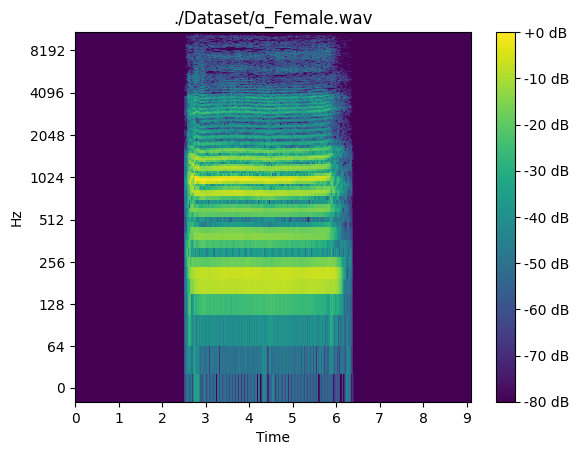

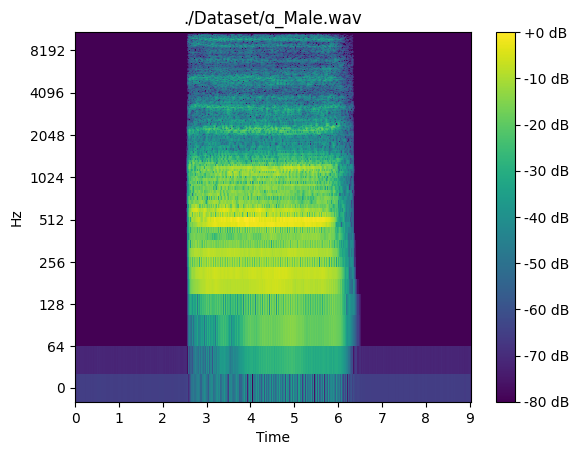

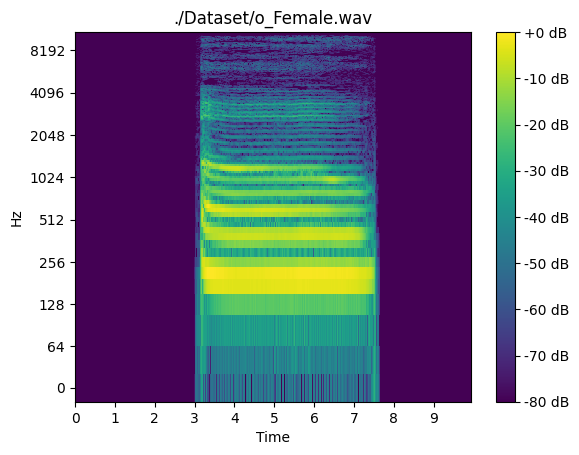

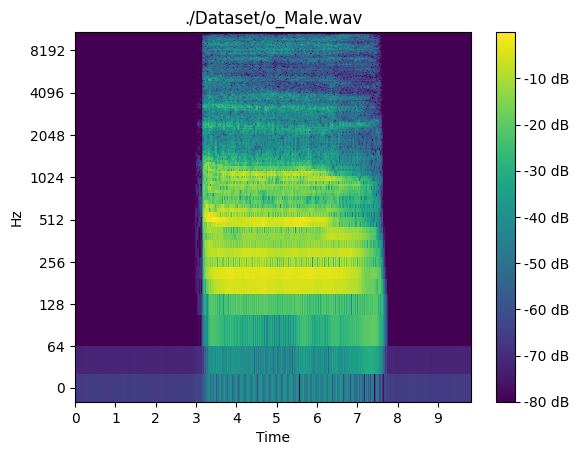

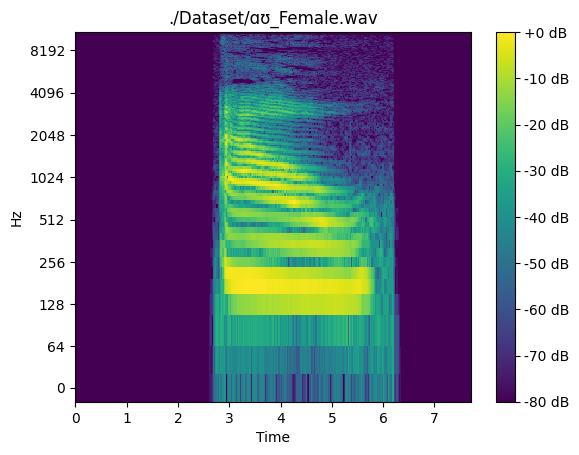

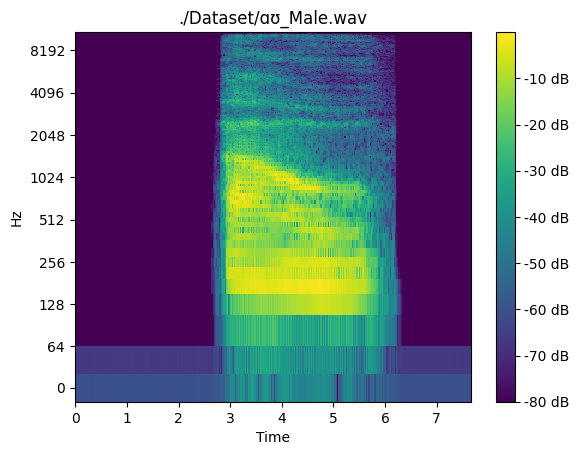

In [6]:
for file in ['ɑ_Female','ɑ_Male','o_Female','o_Male','ɑʊ_Female','ɑʊ_Male']:
    file = './Dataset/'+file+'.wav'
    y,sr = librosa.load(file)
    stft = np.abs(librosa.stft(y,n_fft=512))
    stft_db = librosa.amplitude_to_db(stft, ref=np.max)
    librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title(file)
    plt.show()


# Effect of low and high n_fft on spectrograms
- Higher n_fft values provide better frequency resolution by increasing the number of frequency bins in the FFT. This allows the spectrogram to display more detailed frequency information, making harmonics and formants sharper and more distinct. A higher n_fft helps differentiate closely spaced harmonics, which is especially useful for analyzing male voices with lower fundamental frequencies where harmonics are farther apart.

- Lower n_fft values decrease frequency resolution, causing harmonics and formants to blend together, which can make it harder to distinguish individual harmonics, especially in higher-pitched (e.g., female) voices where harmonics are already closer together.

In a spectrogram, several noticeable differences between male and female voices arise due to physiological distinctions in vocal anatomy, which impact frequency range, pitch, and formant structure:

### Fundamental Frequency:
    Male voices typically have a lower fundamental frequency, usually between 85–180 Hz, due to larger vocal cords. This frequency band appears in the lower part of the spectrogram.
    Female voices generally have a higher fundamental frequency, typically between 165–255 Hz. Consequently, their pitch appears higher up in the spectrogram than male voices.

### Harmonic Spacing:
    The harmonics (overtones) are more densely packed in female voices due to the higher pitch, whereas male voices have wider harmonic spacing as a result of lower fundamental frequencies.

### Formant Frequencies:
    Formants are resonant frequencies in the vocal tract that amplify certain frequencies, crucial for vowel sounds.
    In male voices, the formant frequencies are generally lower, appearing closer to the fundamental frequency. Female voices, on the other hand, have slightly higher formant frequencies due to generally shorter vocal tracts, which causes these formant peaks to appear higher on the spectrogram.